# Introdução à Robótica Inteligente
## Projeto 2024/25
#### Trabalho de José Guilherme Santos (202208081)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Mostrar a evolução dos labirintos e das suas soluções

#### Labirintos com o mesmo número de celulas centrais (100) mas com tamanhos de becos diferentes

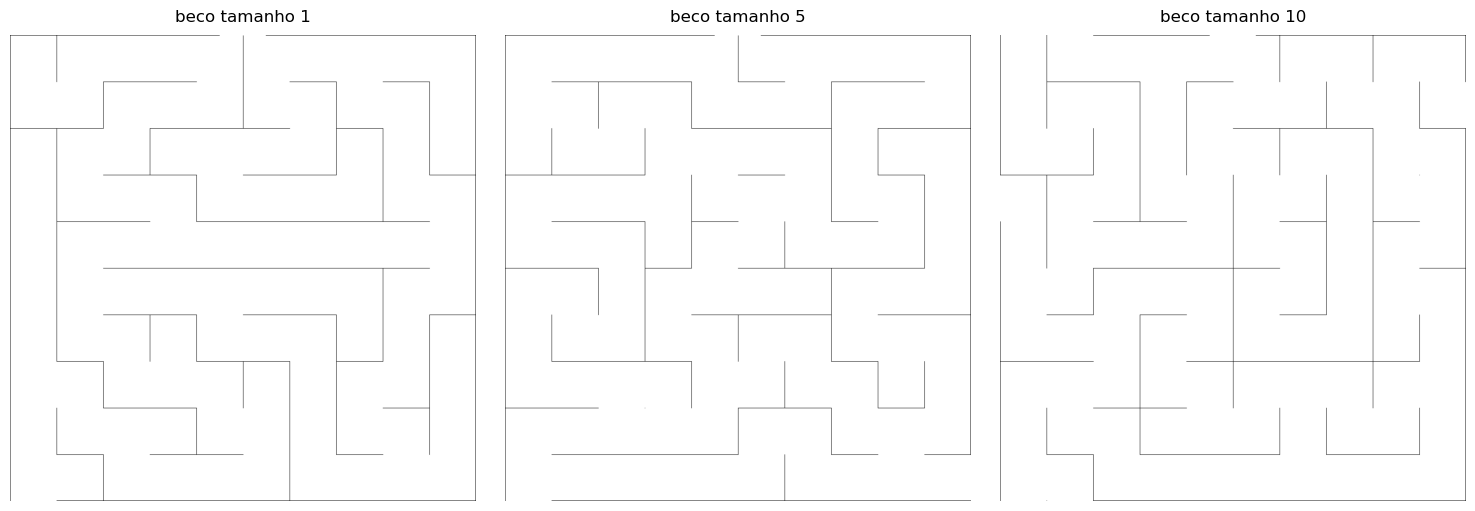

In [2]:
image_paths = [
    r'C:\Users\Gui\Documents\Uni\IRI\IRI_public_TP_classes-master\worlds\custom_maps\maze_10_1.png',
    r'C:\Users\Gui\Documents\Uni\IRI\IRI_public_TP_classes-master\worlds\custom_maps\maze_10_5.png',
    r'C:\Users\Gui\Documents\Uni\IRI\IRI_public_TP_classes-master\worlds\custom_maps\maze_10_10.png',
]

captions = ['beco tamanho 1', 'beco tamanho 5', 'beco tamanho 10']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, img_path, caption in zip(axes, image_paths, captions):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(caption, fontsize=12, pad=10)  # legenda acima

plt.tight_layout()
plt.show()

#### Labirintos com o mesmo tamanho de becos (10) mas com número de células centrais diferentes

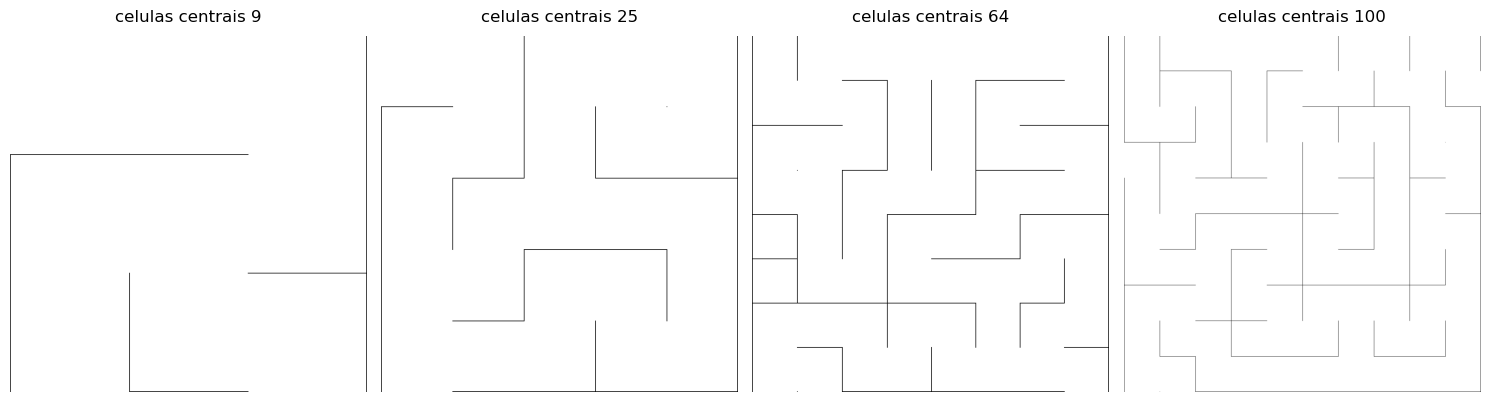

In [3]:
image_paths = [
    r'C:\Users\Gui\Documents\Uni\IRI\IRI_public_TP_classes-master\worlds\custom_maps\maze_3_10.png',
    r'C:\Users\Gui\Documents\Uni\IRI\IRI_public_TP_classes-master\worlds\custom_maps\maze_5_10.png',
    r'C:\Users\Gui\Documents\Uni\IRI\IRI_public_TP_classes-master\worlds\custom_maps\maze_8_10.png',
    r'C:\Users\Gui\Documents\Uni\IRI\IRI_public_TP_classes-master\worlds\custom_maps\maze_10_10.png',
]

captions = ['celulas centrais 9', 'celulas centrais 25', 'celulas centrais 64', 'celulas centrais 100']

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for ax, img_path, caption in zip(axes, image_paths, captions):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(caption, fontsize=12, pad=10)  # legenda acima

plt.tight_layout()
plt.show()

#### Comparação dos algoritmo A*, D* Lite e RRT para o mesmo labirinto


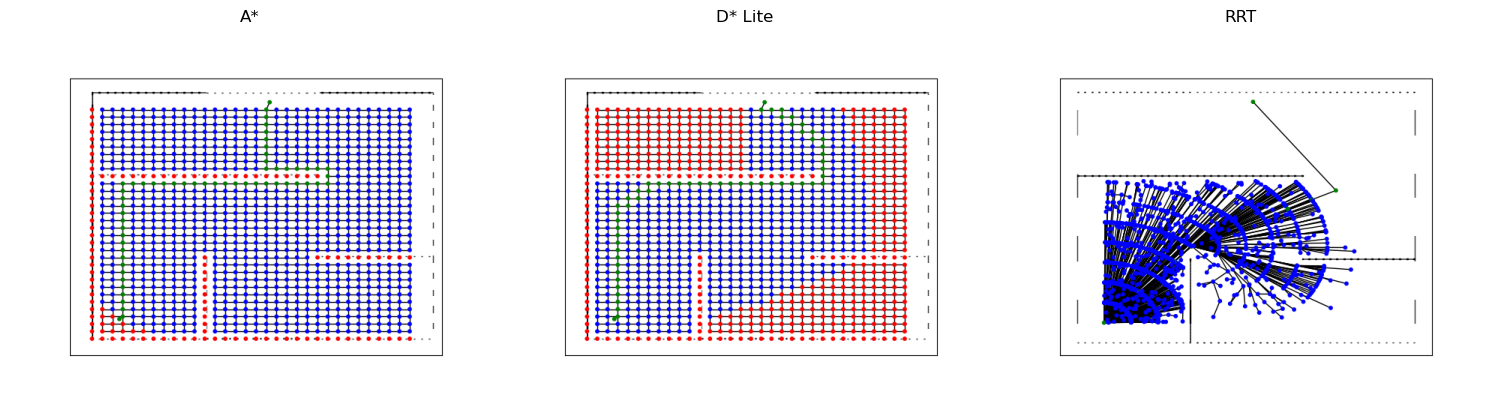

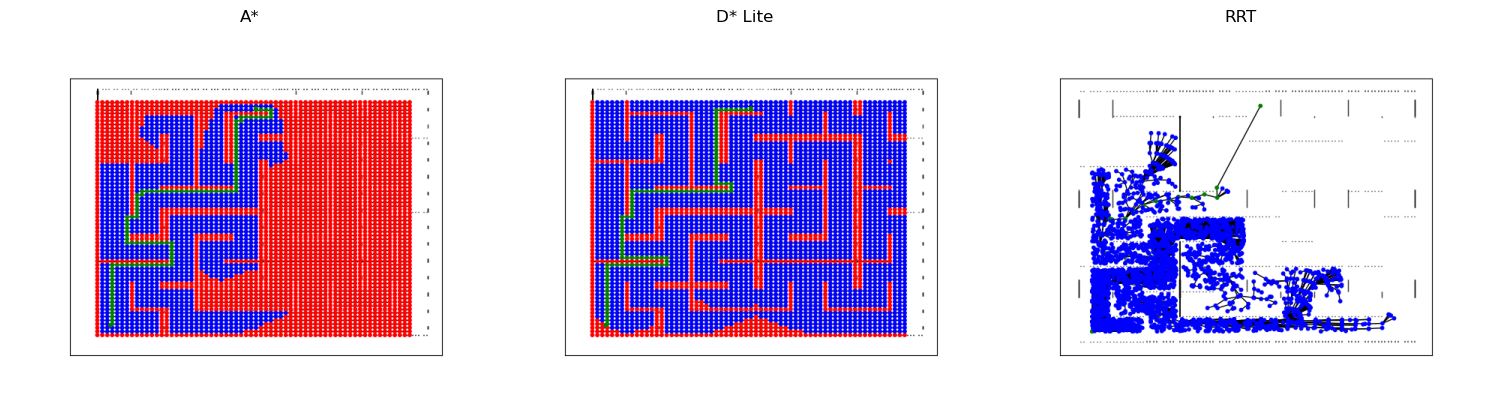

In [4]:
image_paths = [
    r'C:\Users\Gui\Documents\Uni\IRI\IRI_public_TP_classes-master\results\A3_10.png',
    r'C:\Users\Gui\Documents\Uni\IRI\IRI_public_TP_classes-master\results\D3_10.png',
    r'C:\Users\Gui\Documents\Uni\IRI\IRI_public_TP_classes-master\results\RRT3_10.png',
]

captions = ['A*', 'D* Lite', 'RRT']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, img_path, caption in zip(axes, image_paths, captions):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(caption, fontsize=12, pad=10)  # legenda acima

plt.tight_layout()
plt.show()

image_paths = [
    r'C:\Users\Gui\Documents\Uni\IRI\IRI_public_TP_classes-master\results\A10_10.png',
    r'C:\Users\Gui\Documents\Uni\IRI\IRI_public_TP_classes-master\results\D10_10.png',
    r'C:\Users\Gui\Documents\Uni\IRI\IRI_public_TP_classes-master\results\RRT10_10.png',
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, img_path, caption in zip(axes, image_paths, captions):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(caption, fontsize=12, pad=10)  # legenda acima

plt.tight_layout()
plt.show()

## Comparar os resultados obtidos

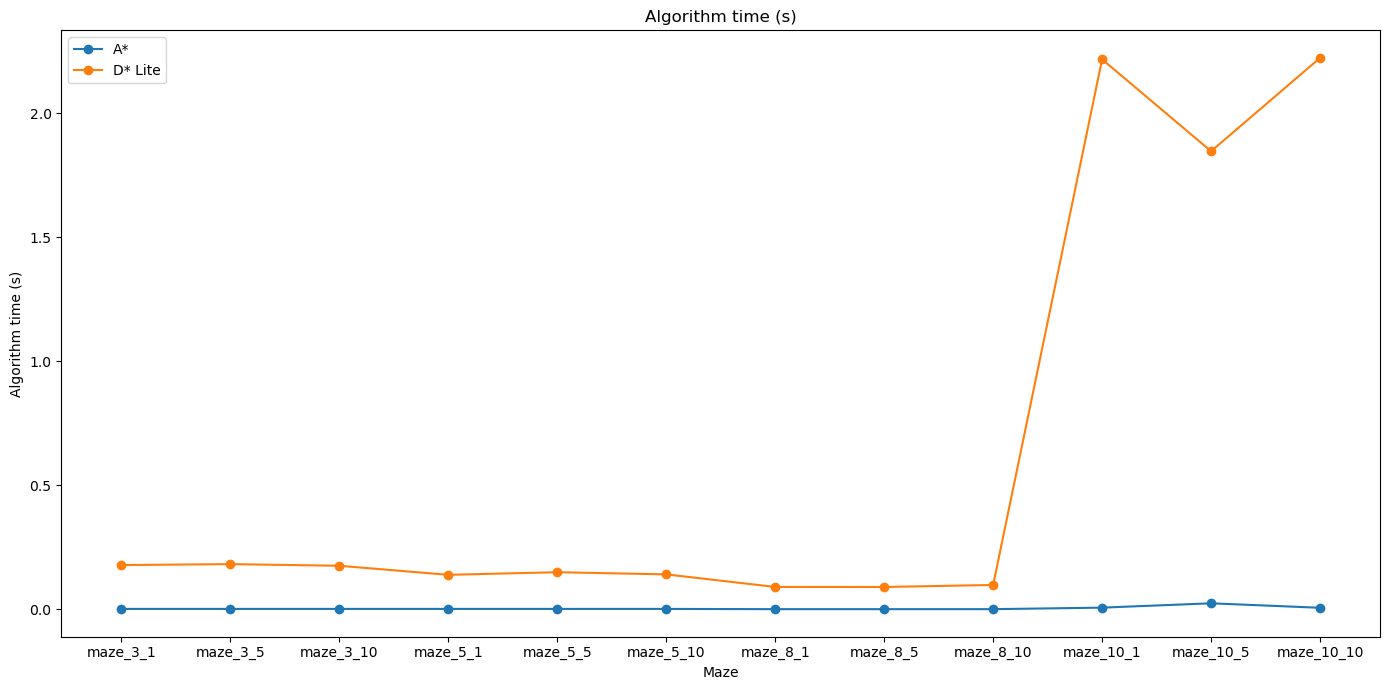

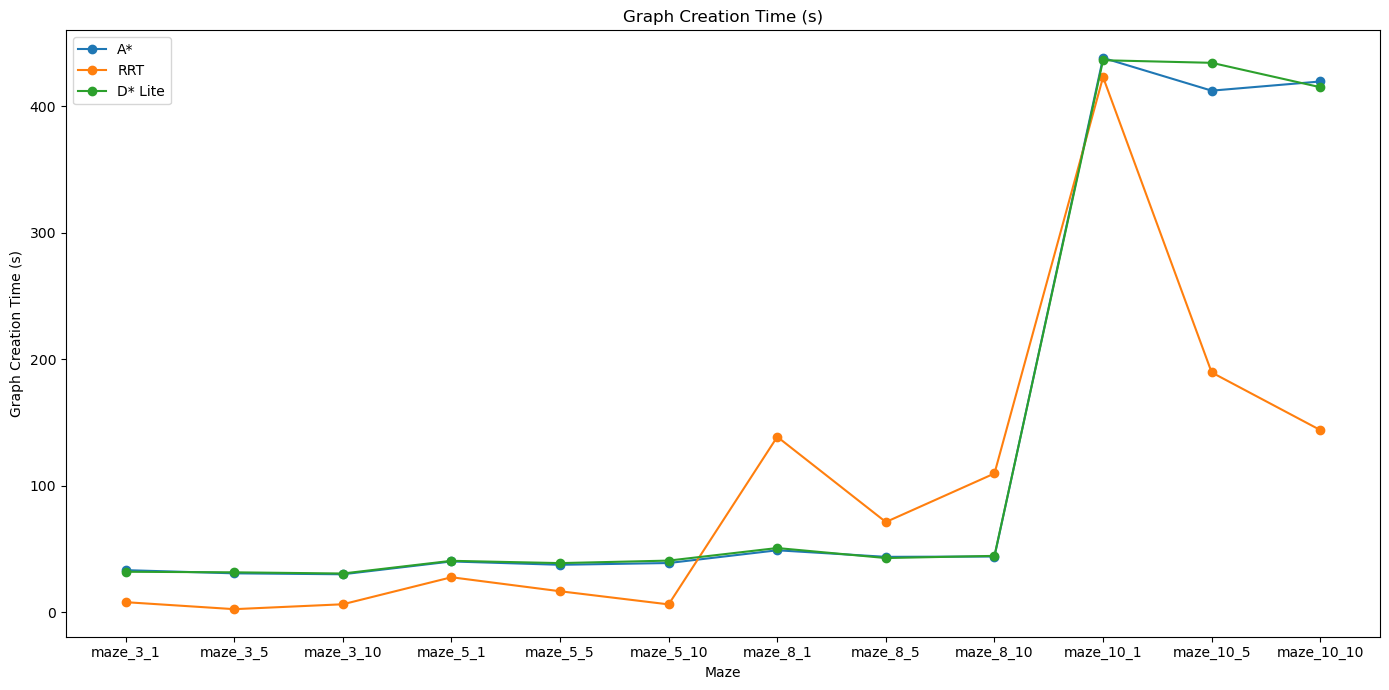

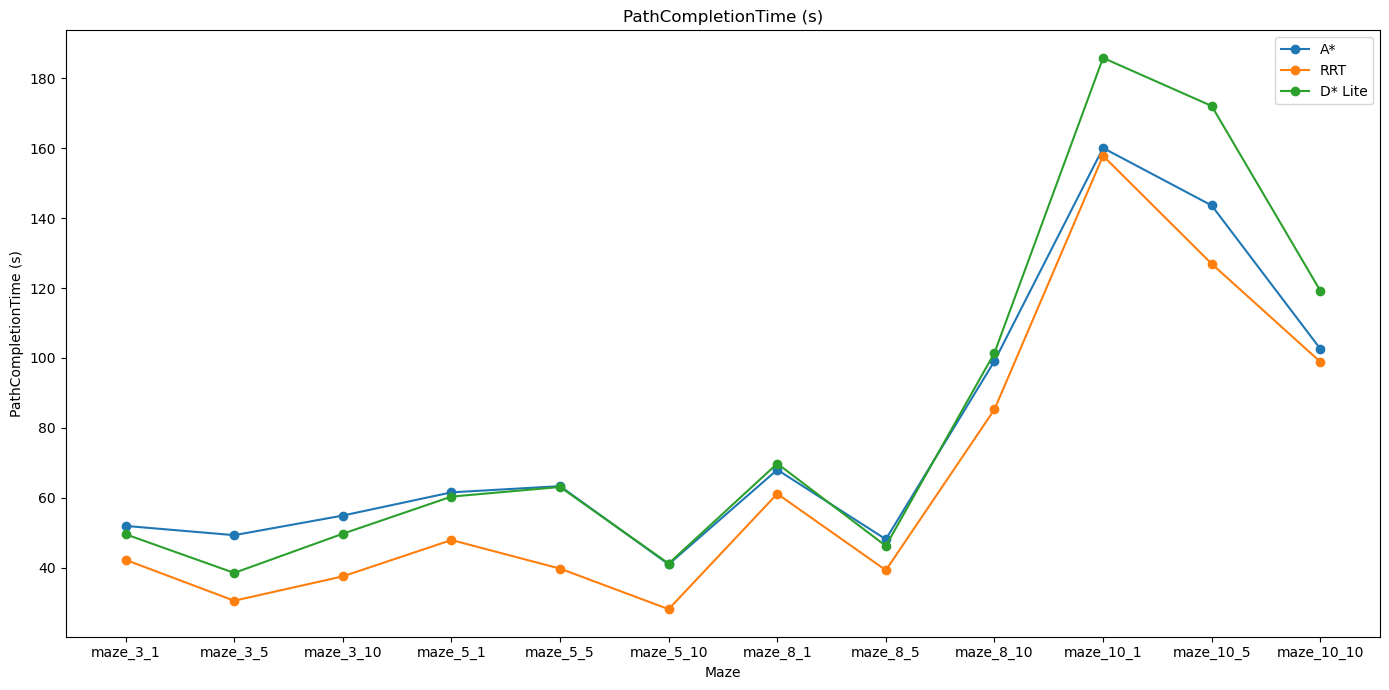

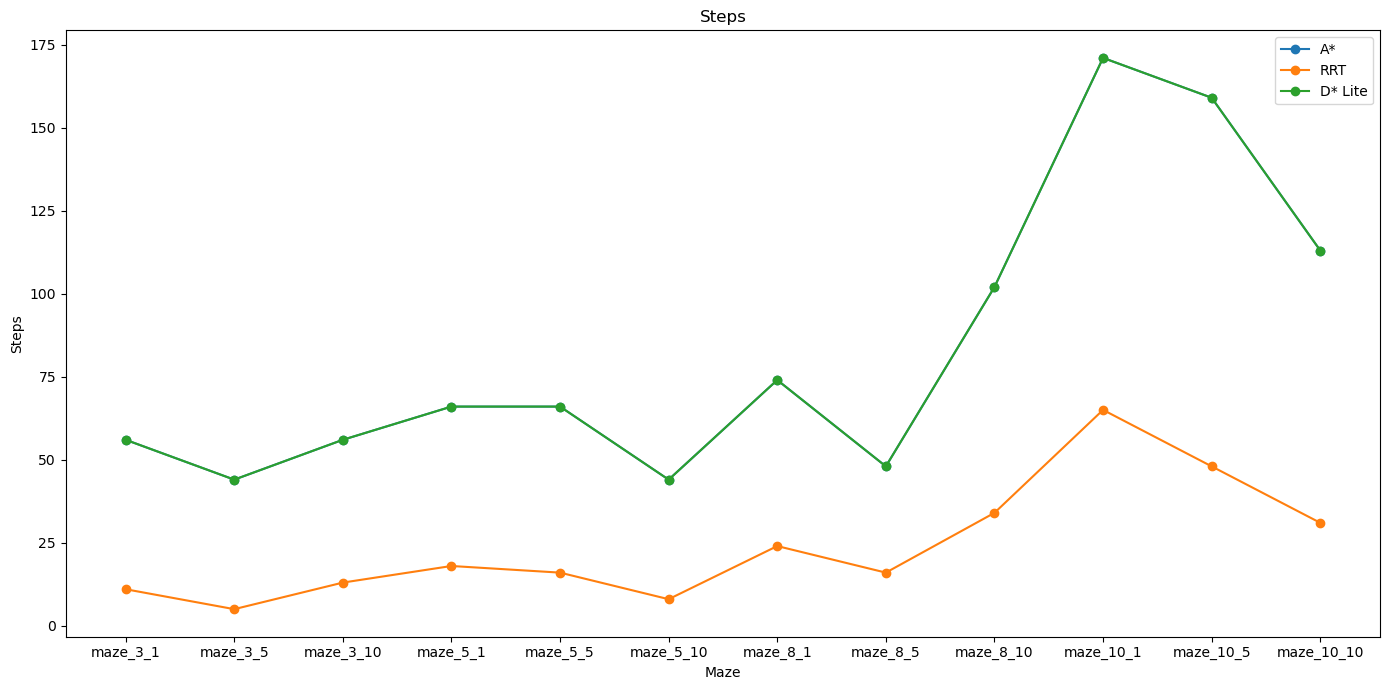

In [5]:
path = r'C:\Users\Gui\Documents\Uni\IRI\IRI_public_TP_classes-master\results\maze_comparison.csv'
df_raw = pd.read_csv(path, header=None)
algo_row   = df_raw.iloc[0]
metric_row = df_raw.iloc[1]

algo_names = []
current = None
for cell in algo_row:
    if pd.notna(cell):
        current = cell
    algo_names.append(current)

col_names = []
for algo, metric in zip(algo_names, metric_row):
    if algo == 'Maze':
        col_names.append('Maze')
    else:
        if pd.isna(metric):
            col_names.append(algo)
        else:
            col_names.append(f"{algo} - {metric}")

df = df_raw.drop([0, 1]).reset_index(drop=True)
df.columns = col_names

for col in df.columns:
    if col != 'Maze':
        df[col] = pd.to_numeric(df[col], errors='coerce')

metrics = sorted({name.split(' - ')[1] for name in df.columns if ' - ' in name})

for metric in metrics:
    plt.figure(figsize=(14, 7))
    for name in df.columns:
        if name.endswith(metric):
            algo = name.split(' - ')[0]
            plt.plot(df['Maze'], df[name], marker='o', label=algo)
    plt.title(metric)
    plt.xlabel('Maze')
    plt.ylabel(metric)
    plt.legend()
    plt.tight_layout()
    plt.show()

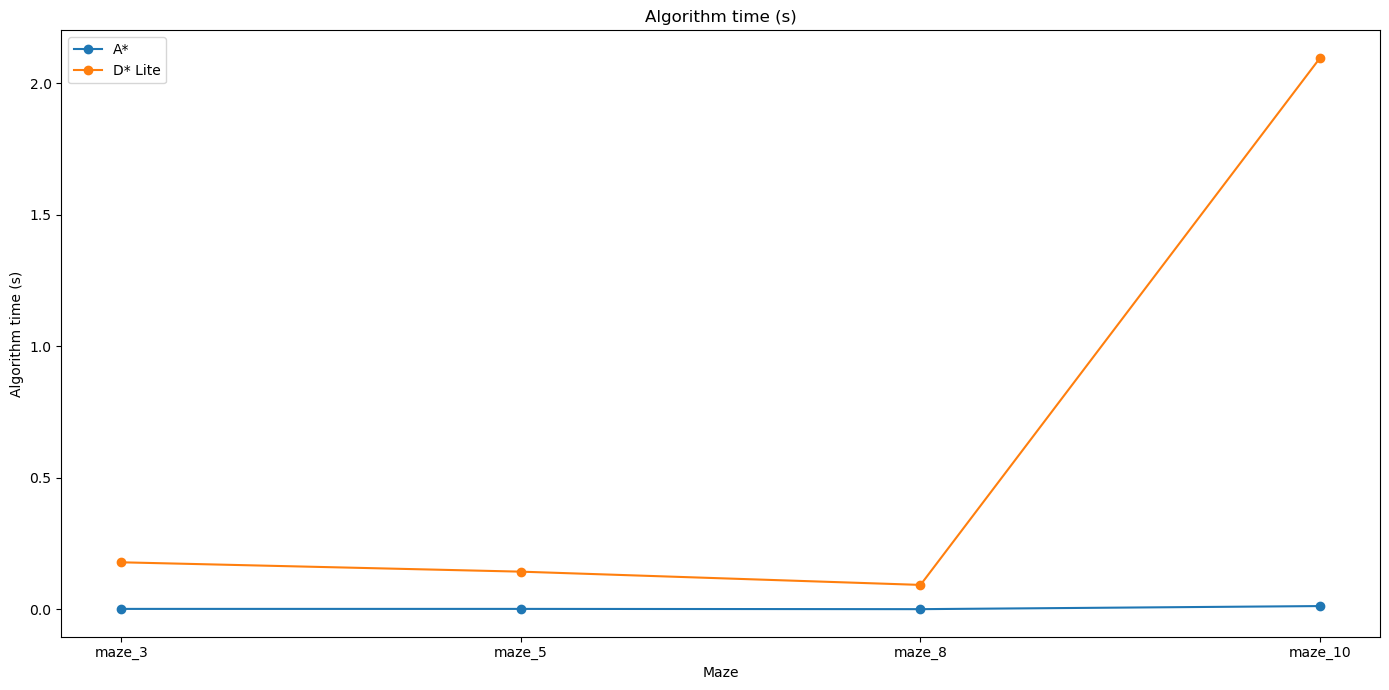

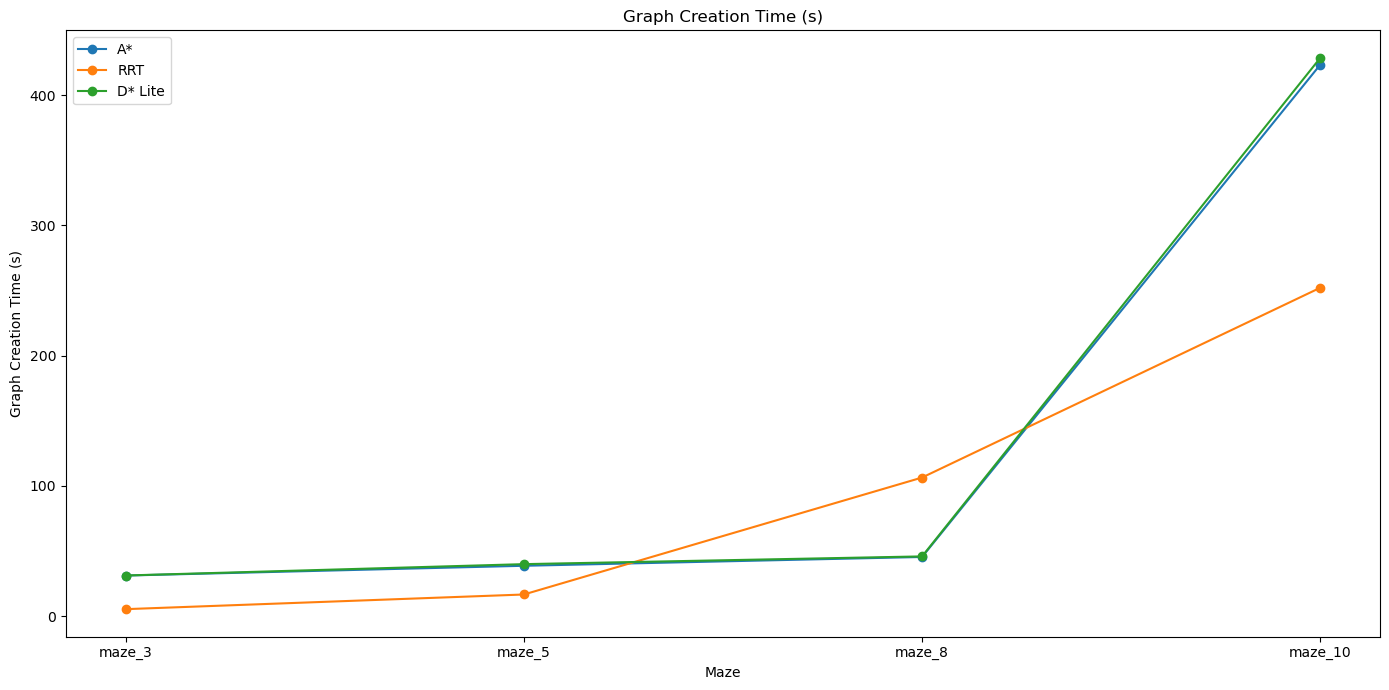

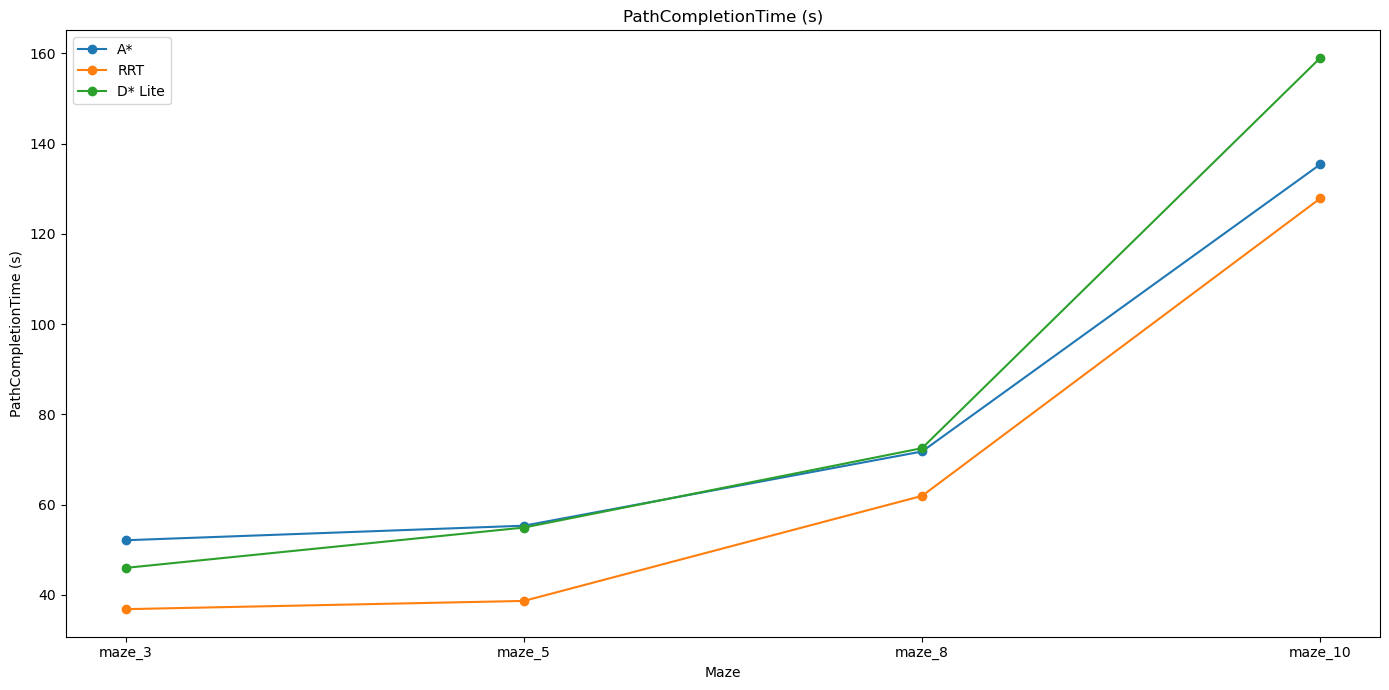

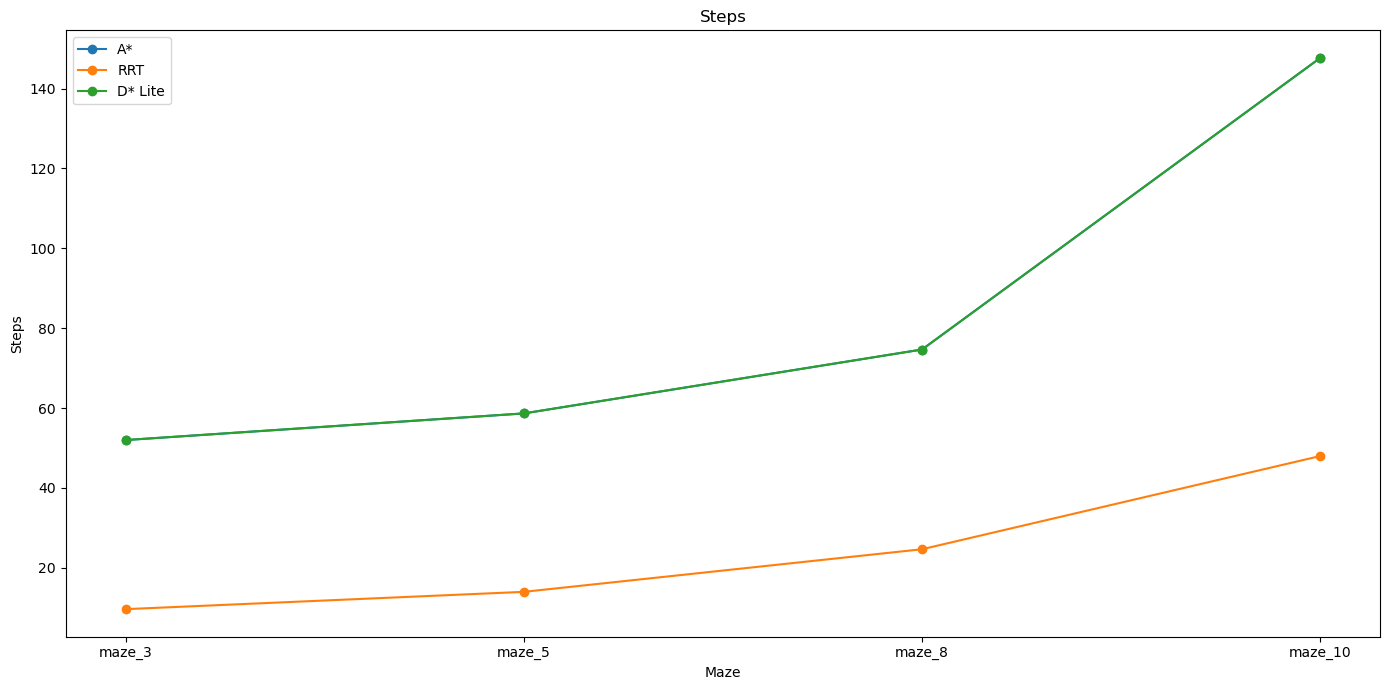

In [6]:
path = r'C:\Users\Gui\Documents\Uni\IRI\IRI_public_TP_classes-master\results\maze_mean.csv'
df_raw = pd.read_csv(path, header=None)
algo_row   = df_raw.iloc[0]
metric_row = df_raw.iloc[1]

algo_names = []
current = None
for cell in algo_row:
    if pd.notna(cell):
        current = cell
    algo_names.append(current)

col_names = []
for algo, metric in zip(algo_names, metric_row):
    if algo == 'Maze':
        col_names.append('Maze')
    else:
        if pd.isna(metric):
            col_names.append(algo)
        else:
            col_names.append(f"{algo} - {metric}")

df = df_raw.drop([0, 1]).reset_index(drop=True)
df.columns = col_names

for col in df.columns:
    if col != 'Maze':
        df[col] = pd.to_numeric(df[col], errors='coerce')

metrics = sorted({name.split(' - ')[1] for name in df.columns if ' - ' in name})

for metric in metrics:
    plt.figure(figsize=(14, 7))
    for name in df.columns:
        if name.endswith(metric):
            algo = name.split(' - ')[0]
            plt.plot(df['Maze'], df[name], marker='o', label=algo)
    plt.title(metric)
    plt.xlabel('Maze')
    plt.ylabel(metric)
    plt.legend()
    plt.tight_layout()
    plt.show()

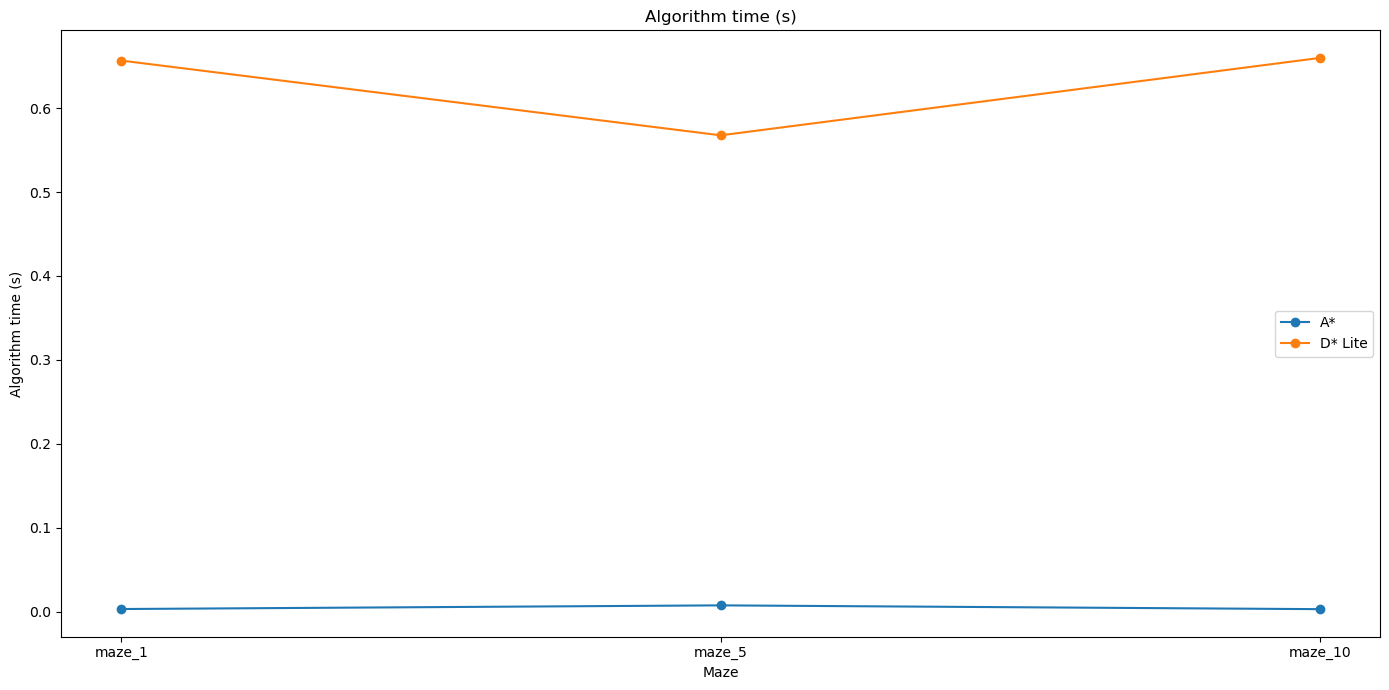

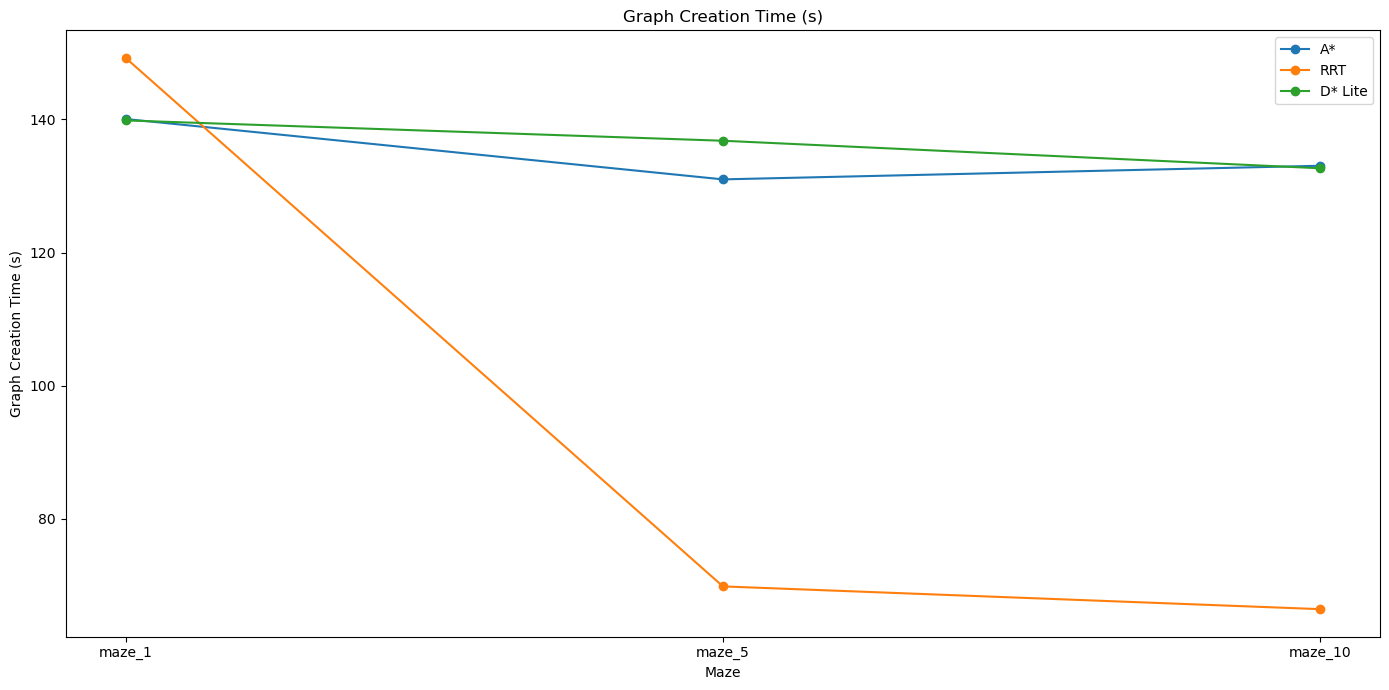

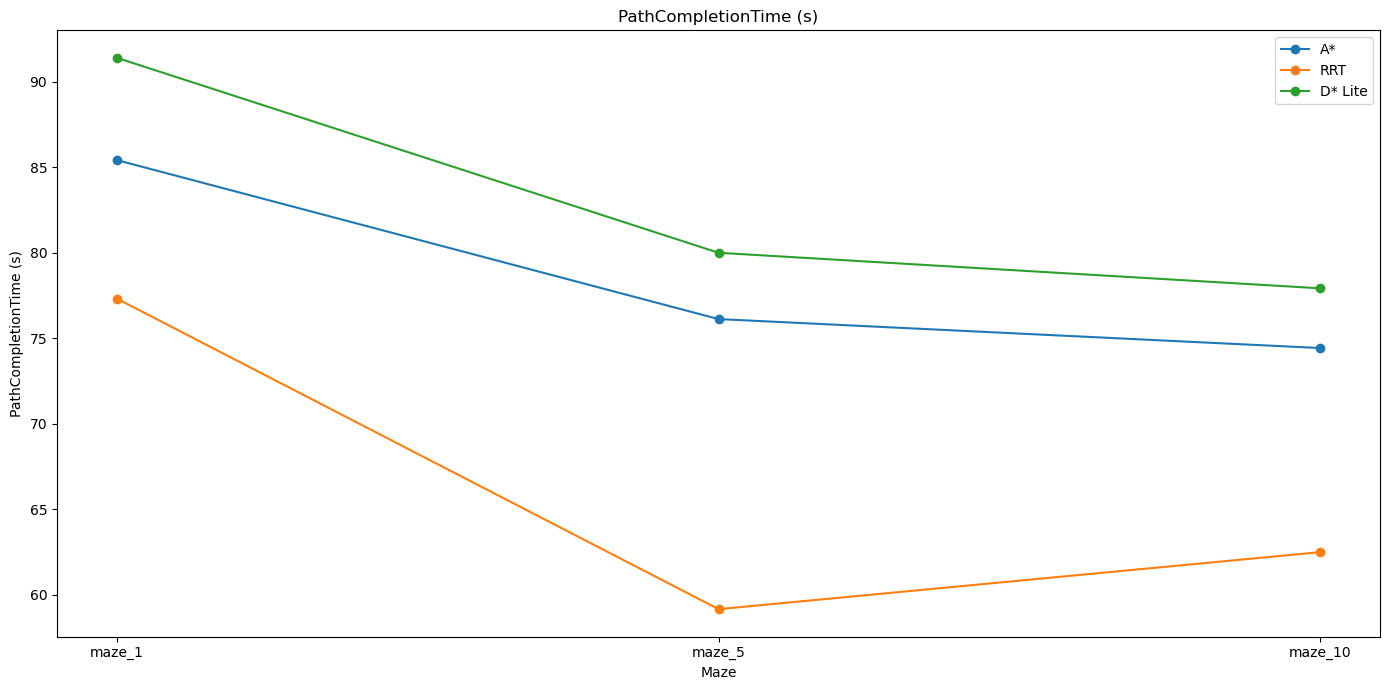

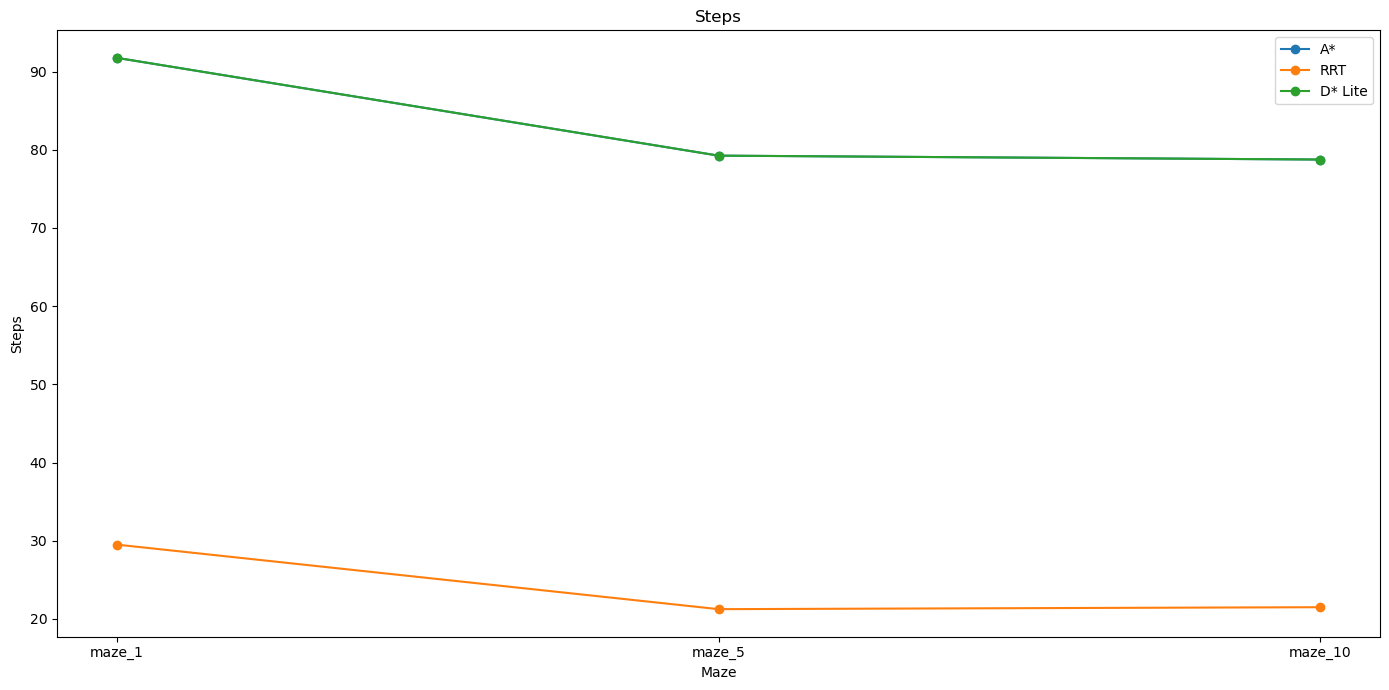

In [7]:
path = r'C:\Users\Gui\Documents\Uni\IRI\IRI_public_TP_classes-master\results\dead_end_mean.csv'
df_raw = pd.read_csv(path, header=None)
algo_row   = df_raw.iloc[0]
metric_row = df_raw.iloc[1]

algo_names = []
current = None
for cell in algo_row:
    if pd.notna(cell):
        current = cell
    algo_names.append(current)

col_names = []
for algo, metric in zip(algo_names, metric_row):
    if algo == 'Maze':
        col_names.append('Maze')
    else:
        if pd.isna(metric):
            col_names.append(algo)
        else:
            col_names.append(f"{algo} - {metric}")

df = df_raw.drop([0, 1]).reset_index(drop=True)
df.columns = col_names

for col in df.columns:
    if col != 'Maze':
        df[col] = pd.to_numeric(df[col], errors='coerce')

metrics = sorted({name.split(' - ')[1] for name in df.columns if ' - ' in name})

for metric in metrics:
    plt.figure(figsize=(14, 7))
    for name in df.columns:
        if name.endswith(metric):
            algo = name.split(' - ')[0]
            plt.plot(df['Maze'], df[name], marker='o', label=algo)
    plt.title(metric)
    plt.xlabel('Maze')
    plt.ylabel(metric)
    plt.legend()
    plt.tight_layout()
    plt.show()